In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

from sklearn.model_selection import train_test_split # holdout
from sklearn.inspection import permutation_importance
from sklearn.metrics import matthews_corrcoef, make_scorer
import pycaret
from pycaret.classification import *

In [2]:
DATA = Path("../../data")

In [3]:
train_data = pd.read_csv(DATA / "train_outlier_preprocessing.csv")
test_data = pd.read_csv(DATA / "test_outlier_preprocessing.csv")

In [4]:
train_data

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,NaN,NaN,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,NaN,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,NaN,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,NaN,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,...,b,NaN,w,u,w,t,NaN,NaN,d,u
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,x,NaN,e,f,a,NaN,w,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,NaN,NaN,n,t,NaN,NaN,p,...,NaN,y,w,NaN,NaN,t,p,NaN,d,u


In [5]:
del train_data["id"]

In [6]:
test_data

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,NaN,NaN,d,a
1,3116946,6.90,NaN,NaN,NaN,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,NaN,n,f,NaN,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,NaN,y,f,NaN,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,x,g,w,f,a,d,w,2.67,...,NaN,NaN,e,NaN,NaN,f,f,NaN,d,u
2077960,5194905,3.12,x,s,w,f,d,c,w,2.69,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
2077961,5194906,5.73,x,NaN,e,f,a,NaN,w,6.16,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
2077962,5194907,5.03,b,g,n,f,a,d,g,6.00,...,NaN,s,g,NaN,NaN,f,f,NaN,d,a


In [7]:
del test_data["id"]

In [8]:
print(f"Train Shape : {train_data.shape}")
print(f"Test Shape : {test_data.shape}")

Train Shape : (3116945, 21)
Test Shape : (2077964, 20)


In [9]:
feature = train_data.iloc[:, 1:]
target = train_data.iloc[:, 0]

In [10]:
train_X, valid_X, train_y, valid_y = train_test_split(feature, target, test_size=0.1, shuffle=True, stratify=target, random_state=42) # Holdout

In [11]:
print(f"Train_X Shape : {train_X.shape}")
print(f"Valid_X Shape : {valid_X.shape}")
print(f"Train_y Shape : {train_y.shape}")
print(f"Valid_y Shape : {valid_y.shape}")

Train_X Shape : (2805250, 20)
Valid_X Shape : (311695, 20)
Train_y Shape : (2805250,)
Valid_y Shape : (311695,)


In [12]:
categorical_features = list(feature.select_dtypes(include=["object"]).columns)
numeric_features = list(feature.select_dtypes(include=["float"]).columns)

In [13]:
exp_clf = setup(data=train_data, 
                target='class', 
                categorical_features=categorical_features,
                numeric_features=numeric_features,
                session_id=42)

,Description,Value
0,Session id,42
1,Target,class
2,Target type,Binary
3,Target mapping,"e: 0, p: 1"
4,Original data shape,"(3116945, 21)"
5,Transformed data shape,"(3116945, 95)"
6,Transformed train set shape,"(2181861, 95)"
7,Transformed test set shape,"(935084, 95)"
8,Numeric features,3
9,Categorical features,17


In [14]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [15]:
cb_model = create_model('catboost', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9879,0.9964,0.9879,0.9879,0.9879,0.9756,0.9756
1,0.9875,0.9962,0.9875,0.9875,0.9875,0.9748,0.9748
2,0.9875,0.9960,0.9875,0.9875,0.9875,0.9749,0.9749
3,0.9878,0.9961,0.9878,0.9878,0.9878,0.9754,0.9754
4,0.9878,0.9964,0.9878,0.9879,0.9879,0.9755,0.9755
5,0.9884,0.9964,0.9884,0.9884,0.9884,0.9766,0.9766
6,0.9876,0.9963,0.9876,0.9877,0.9877,0.9751,0.9751
7,0.9881,0.9964,0.9881,0.9881,0.9881,0.9759,0.9759
8,0.9882,0.9963,0.9882,0.9882,0.9882,0.9761,0.9761


In [17]:
val_pred_cb = predict_model(cb_model, data=valid_X)

In [18]:
matthews_corrcoef(valid_y, val_pred_cb["prediction_label"])

0.9761476063575685

In [19]:
xgb_model = create_model('xgboost', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9852,0.9957,0.9852,0.9852,0.9852,0.9702,0.9702
1,0.9852,0.9957,0.9852,0.9852,0.9852,0.9701,0.9702
2,0.9852,0.9954,0.9852,0.9852,0.9852,0.9701,0.9701
3,0.9850,0.9954,0.9850,0.9851,0.9851,0.9698,0.9699
4,0.9855,0.9957,0.9855,0.9856,0.9855,0.9708,0.9708
5,0.9854,0.9956,0.9854,0.9854,0.9854,0.9706,0.9706
6,0.9851,0.9956,0.9851,0.9851,0.9851,0.9699,0.9699
7,0.9857,0.9957,0.9857,0.9857,0.9857,0.9712,0.9712
8,0.9857,0.9957,0.9857,0.9857,0.9857,0.9711,0.9711


In [20]:
val_pred_xgb = predict_model(xgb_model, data=valid_X)

In [21]:
matthews_corrcoef(valid_y, val_pred_xgb["prediction_label"])

0.9703700202121759

In [22]:
lgbm_model = create_model('lightgbm', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9803,0.9950,0.9803,0.9804,0.9803,0.9603,0.9604
1,0.9809,0.9949,0.9809,0.9810,0.9809,0.9615,0.9616
2,0.9806,0.9945,0.9806,0.9807,0.9806,0.9609,0.9609
3,0.9796,0.9947,0.9796,0.9797,0.9796,0.9589,0.9590
4,0.9803,0.9949,0.9803,0.9803,0.9803,0.9602,0.9603
5,0.9807,0.9949,0.9807,0.9807,0.9807,0.9610,0.9610
6,0.9798,0.9945,0.9798,0.9799,0.9798,0.9593,0.9593
7,0.9806,0.9948,0.9806,0.9807,0.9806,0.9610,0.9610
8,0.9803,0.9948,0.9803,0.9804,0.9803,0.9603,0.9603


In [23]:
val_pred_lgbm = predict_model(lgbm_model, data=valid_X)

In [24]:
matthews_corrcoef(valid_y, val_pred_lgbm["prediction_label"])

0.9617372278893888

In [25]:
blend_model = blend_models(estimator_list=[cb_model, xgb_model, lgbm_model], fold=10, choose_better=True, optimize="MCC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9865,0.9961,0.9865,0.9865,0.9865,0.9727,0.9727
1,0.9865,0.9959,0.9865,0.9865,0.9865,0.9728,0.9728
2,0.9863,0.9956,0.9863,0.9863,0.9863,0.9724,0.9724
3,0.9863,0.9957,0.9863,0.9863,0.9863,0.9724,0.9724
4,0.9865,0.9960,0.9865,0.9865,0.9865,0.9728,0.9728
5,0.9868,0.9959,0.9868,0.9868,0.9868,0.9734,0.9734
6,0.9861,0.9958,0.9861,0.9861,0.9861,0.9719,0.9719
7,0.9870,0.9959,0.9870,0.9870,0.9870,0.9737,0.9737
8,0.9869,0.9959,0.9869,0.9869,0.9869,0.9736,0.9737


Original model was better than the blended model, hence it will be returned. NOTE: The display metrics are for the blended model (not the original one).


In [27]:
val_pred_blend = predict_model(blend_model, data=valid_X)

In [34]:
val_pred_blend

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,prediction_label,prediction_score
2074353,6.39,x,y,n,f,NaN,c,w,4.820000,9.880000,...,n,NaN,NaN,f,f,NaN,d,a,e,0.9970
2342417,11.48,x,s,n,f,NaN,NaN,y,5.930000,16.540001,...,n,NaN,NaN,f,f,NaN,d,u,p,0.9620
2902423,3.71,x,NaN,e,f,NaN,NaN,e,4.370000,6.220000,...,e,NaN,NaN,f,f,n,d,a,p,0.9985
3037232,9.61,x,NaN,n,t,NaN,NaN,p,9.780000,18.530001,...,w,NaN,NaN,t,p,NaN,d,a,e,0.9968
1824838,3.45,s,NaN,n,f,f,NaN,NaN,6.970000,8.120000,...,o,NaN,NaN,f,f,NaN,d,a,e,0.9990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2831129,9.68,NaN,y,w,f,NaN,c,k,22.120001,12.760000,...,w,NaN,NaN,t,e,NaN,u,w,e,0.9995
1075360,8.26,x,g,NaN,f,NaN,NaN,n,8.940000,11.700000,...,o,NaN,NaN,f,f,NaN,d,a,e,0.8795
775624,8.41,x,NaN,y,f,a,c,w,6.350000,17.520000,...,g,NaN,NaN,f,f,NaN,d,a,e,0.9954
2996008,3.39,b,g,g,f,a,d,g,5.140000,3.260000,...,n,NaN,NaN,f,f,NaN,d,s,e,0.9981


In [28]:
matthews_corrcoef(valid_y, val_pred_blend["prediction_label"])

0.9761476063575685

In [41]:
val_pred_blend["true_label"] = valid_y

In [44]:
wrong = val_pred_blend[val_pred_blend["prediction_label"]!=val_pred_blend["true_label"]]

In [45]:
wrong

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,prediction_label,prediction_score,true_label
576067,8.14,f,NaN,n,f,NaN,c,y,9.37,12.97,...,NaN,NaN,f,f,NaN,d,a,e,0.8080,p
1450754,7.19,x,NaN,w,f,a,d,w,5.00,14.28,...,NaN,NaN,f,f,NaN,d,u,e,0.5352,p
194748,4.65,b,NaN,n,f,NaN,c,p,6.32,5.08,...,NaN,NaN,f,f,NaN,m,a,p,0.9995,e
664682,10.62,x,s,n,f,NaN,NaN,n,7.15,20.84,...,NaN,NaN,f,f,NaN,d,u,e,0.9848,p
2704957,10.10,x,NaN,n,f,NaN,NaN,w,12.92,17.82,...,u,w,t,NaN,NaN,d,u,p,0.5653,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2304237,1.13,f,s,y,f,f,NaN,NaN,2.88,5.03,...,NaN,NaN,f,f,NaN,d,a,p,0.9985,e
1815379,3.45,x,NaN,n,f,NaN,c,n,5.98,7.12,...,NaN,NaN,f,f,NaN,d,a,e,0.9684,p
1192977,11.05,f,s,w,t,NaN,NaN,n,8.87,17.08,...,NaN,NaN,t,l,NaN,m,a,e,0.9990,p
2095732,6.80,x,NaN,y,t,NaN,c,y,7.93,16.07,...,NaN,NaN,f,f,NaN,d,u,e,0.9959,p


In [46]:
def display_number(ax, dtype='float'):
    if dtype == 'float':
        for p in ax.patches:
            ax.text(p.get_x() + (p.get_width()/2),
                    p.get_y() + (p.get_height()*1.015),
                    f"{p.get_height():.2f}",
                    ha = 'center')
    elif dtype == 'int':
        for p in ax.patches:
            ax.text(p.get_x() + (p.get_width()/2),
                    p.get_y() + (p.get_height()*1.015),
                    f"{int(p.get_height())}",
                    ha = 'center')

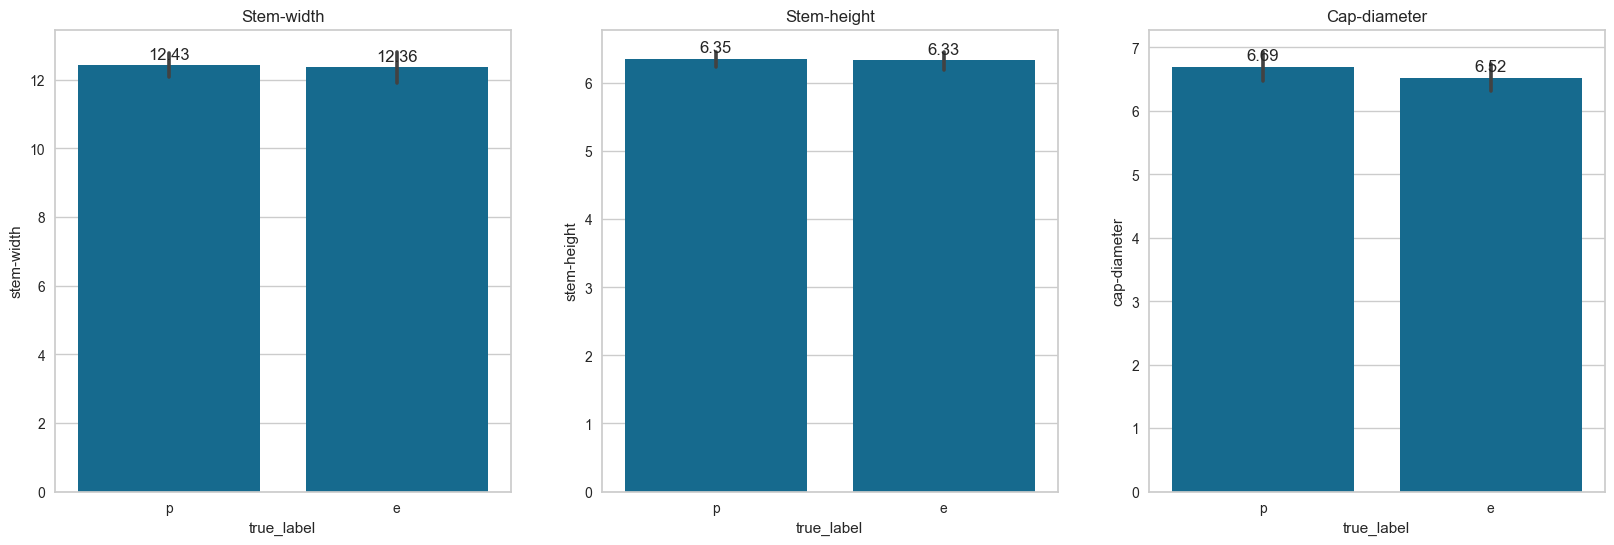

In [47]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
ax1 = sns.barplot(data=wrong, x='true_label', y='stem-width')
display_number(ax1)
ax1.set_title("Stem-width")

plt.subplot(1, 3, 2)
ax2 = sns.barplot(data=wrong, x='true_label', y='stem-height')
ax2.set_title("Stem-height")
display_number(ax2)

plt.subplot(1, 3, 3)
ax3 = sns.barplot(data=wrong, x='true_label', y='cap-diameter')
ax3.set_title("Cap-diameter")
display_number(ax3)

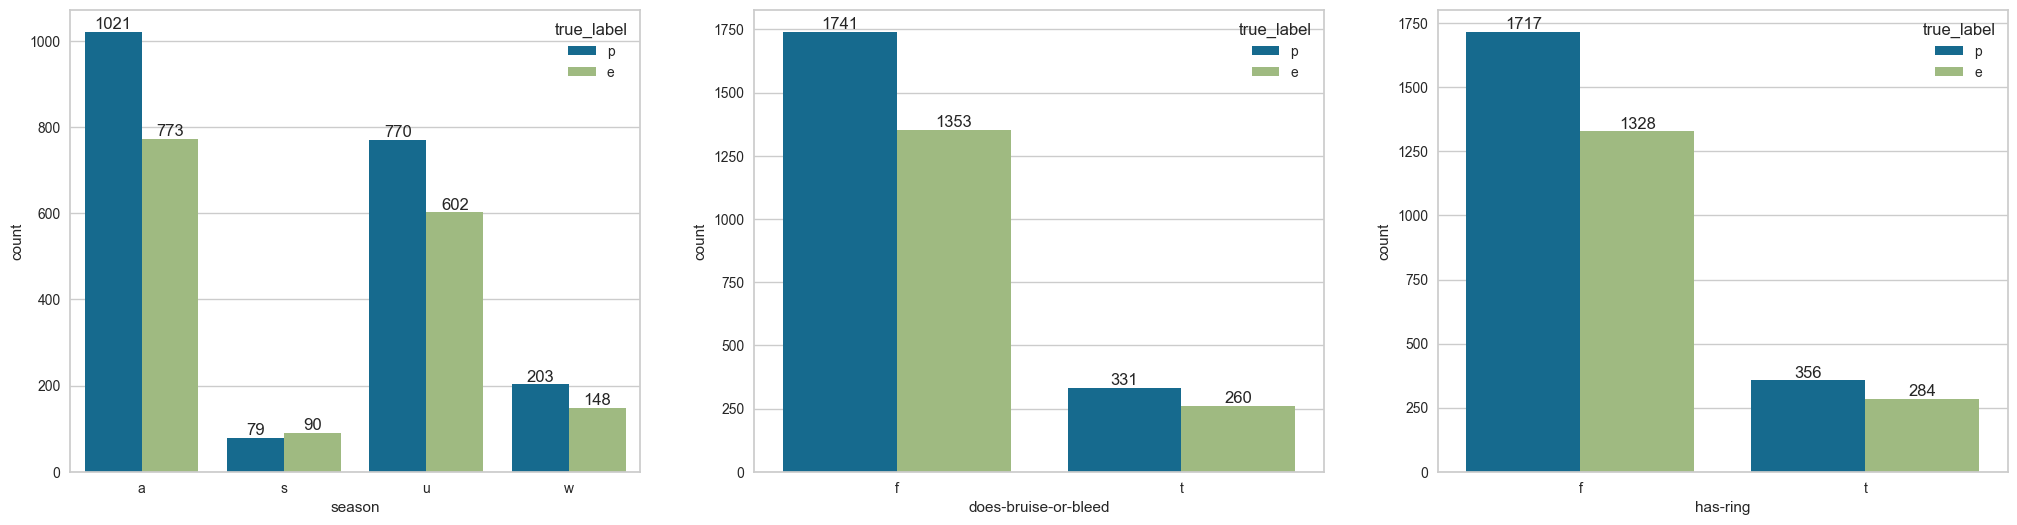

In [48]:
plt.figure(figsize=(25, 6))

plt.subplot(1, 3, 1)
ax4 = sns.countplot(data=wrong, x="season", hue="true_label")
for p in ax4.containers:
    ax4.bar_label(p)

plt.subplot(1, 3, 2)
ax5 = sns.countplot(data=wrong, x="does-bruise-or-bleed", hue='true_label')
for p in ax5.containers:
    ax5.bar_label(p, fmt='%d')

plt.subplot(1, 3, 3)
ax6 = sns.countplot(data=wrong, x="has-ring", hue='true_label')
for p in ax6.containers:
    ax6.bar_label(p, fmt='%d')

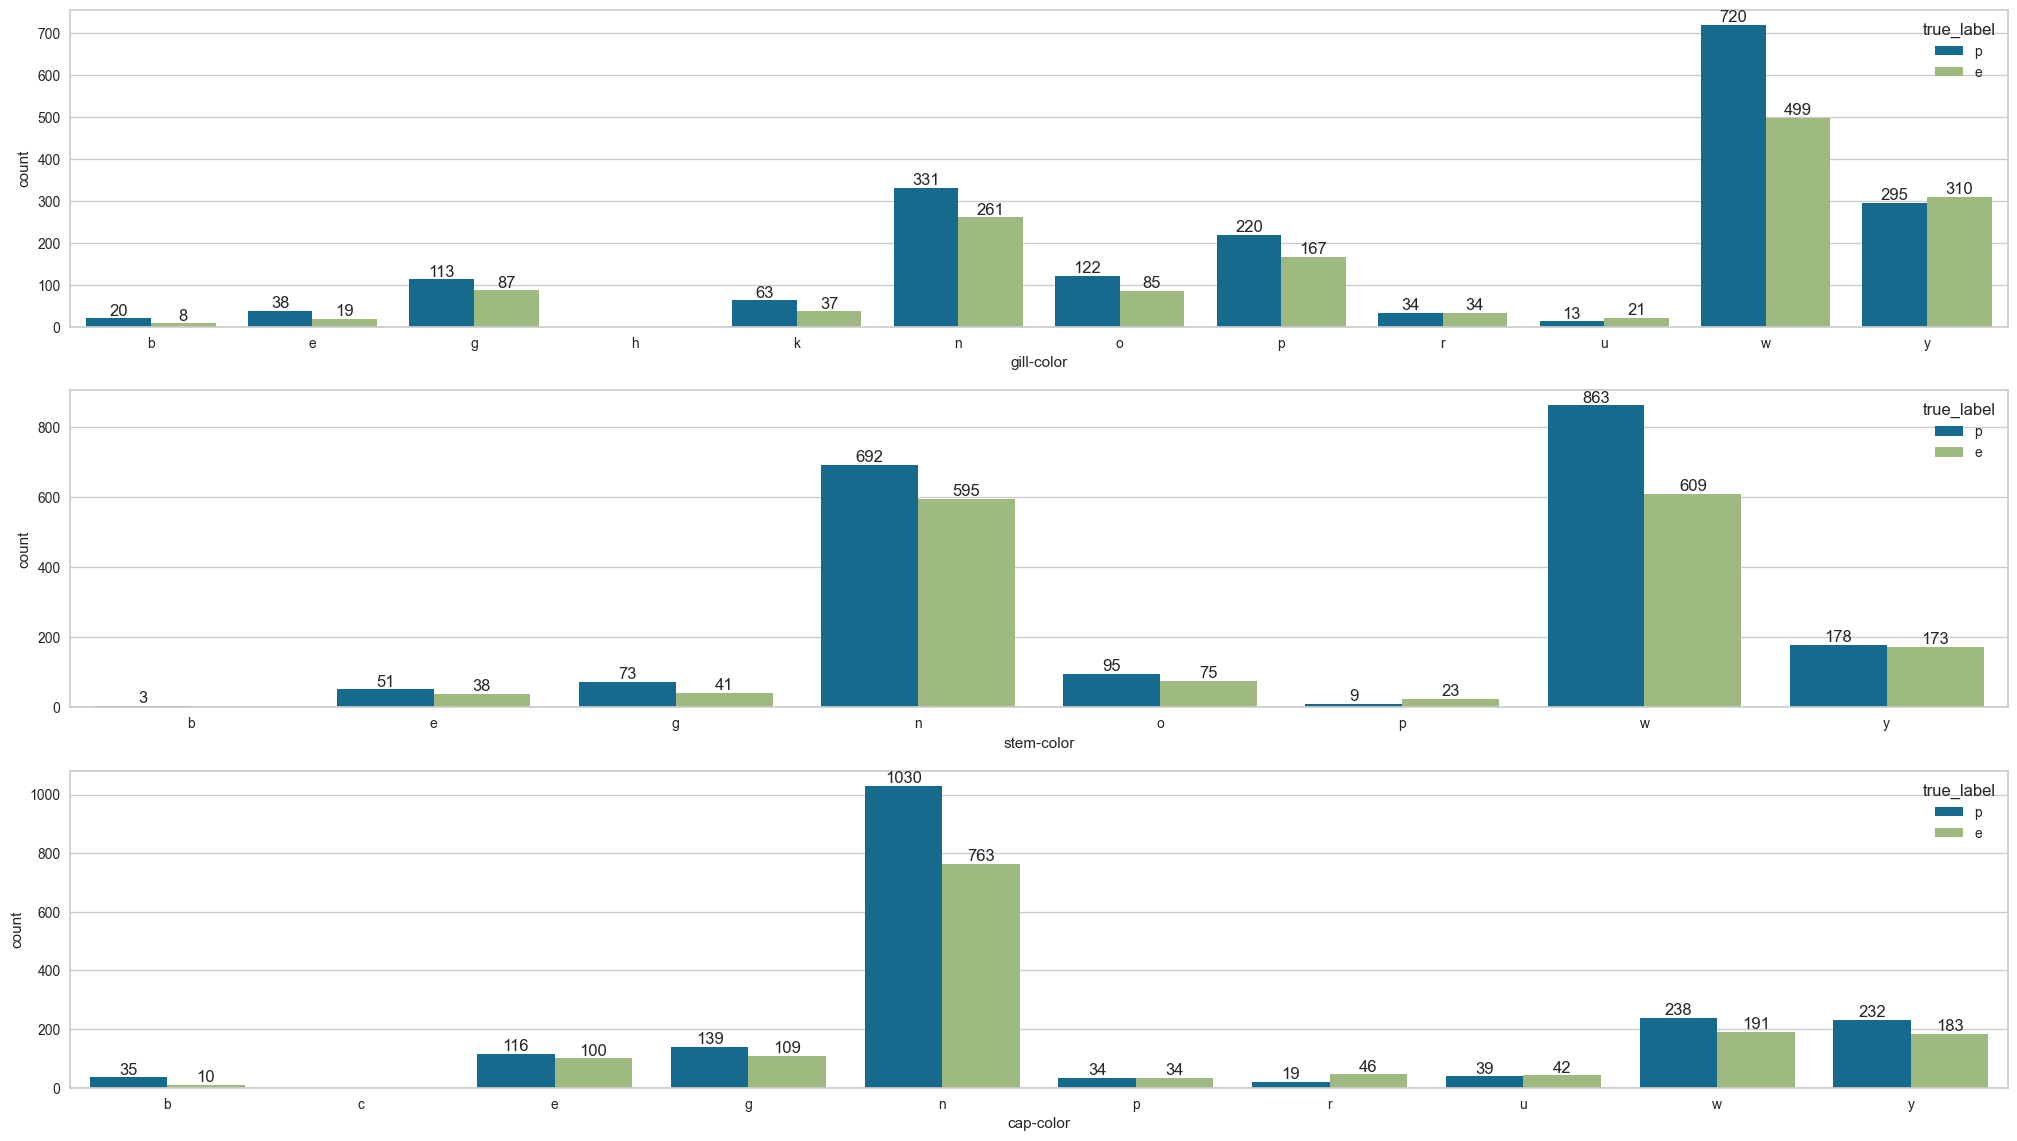

In [50]:
plt.figure(figsize=(25, 14))

plt.subplot(3, 1, 1)
ax7 = sns.countplot(data=wrong, x='gill-color', hue='true_label')
for p in ax7.containers:
    ax7.bar_label(p)

plt.subplot(3, 1, 2)
ax8 = sns.countplot(data=wrong, x='stem-color', hue='true_label')
for p in ax8.containers:
    ax8.bar_label(p)

plt.subplot(3, 1, 3)
ax9 = sns.countplot(data=wrong, x='cap-color', hue='true_label')
for p in ax9.containers:
    ax9.bar_label(p)

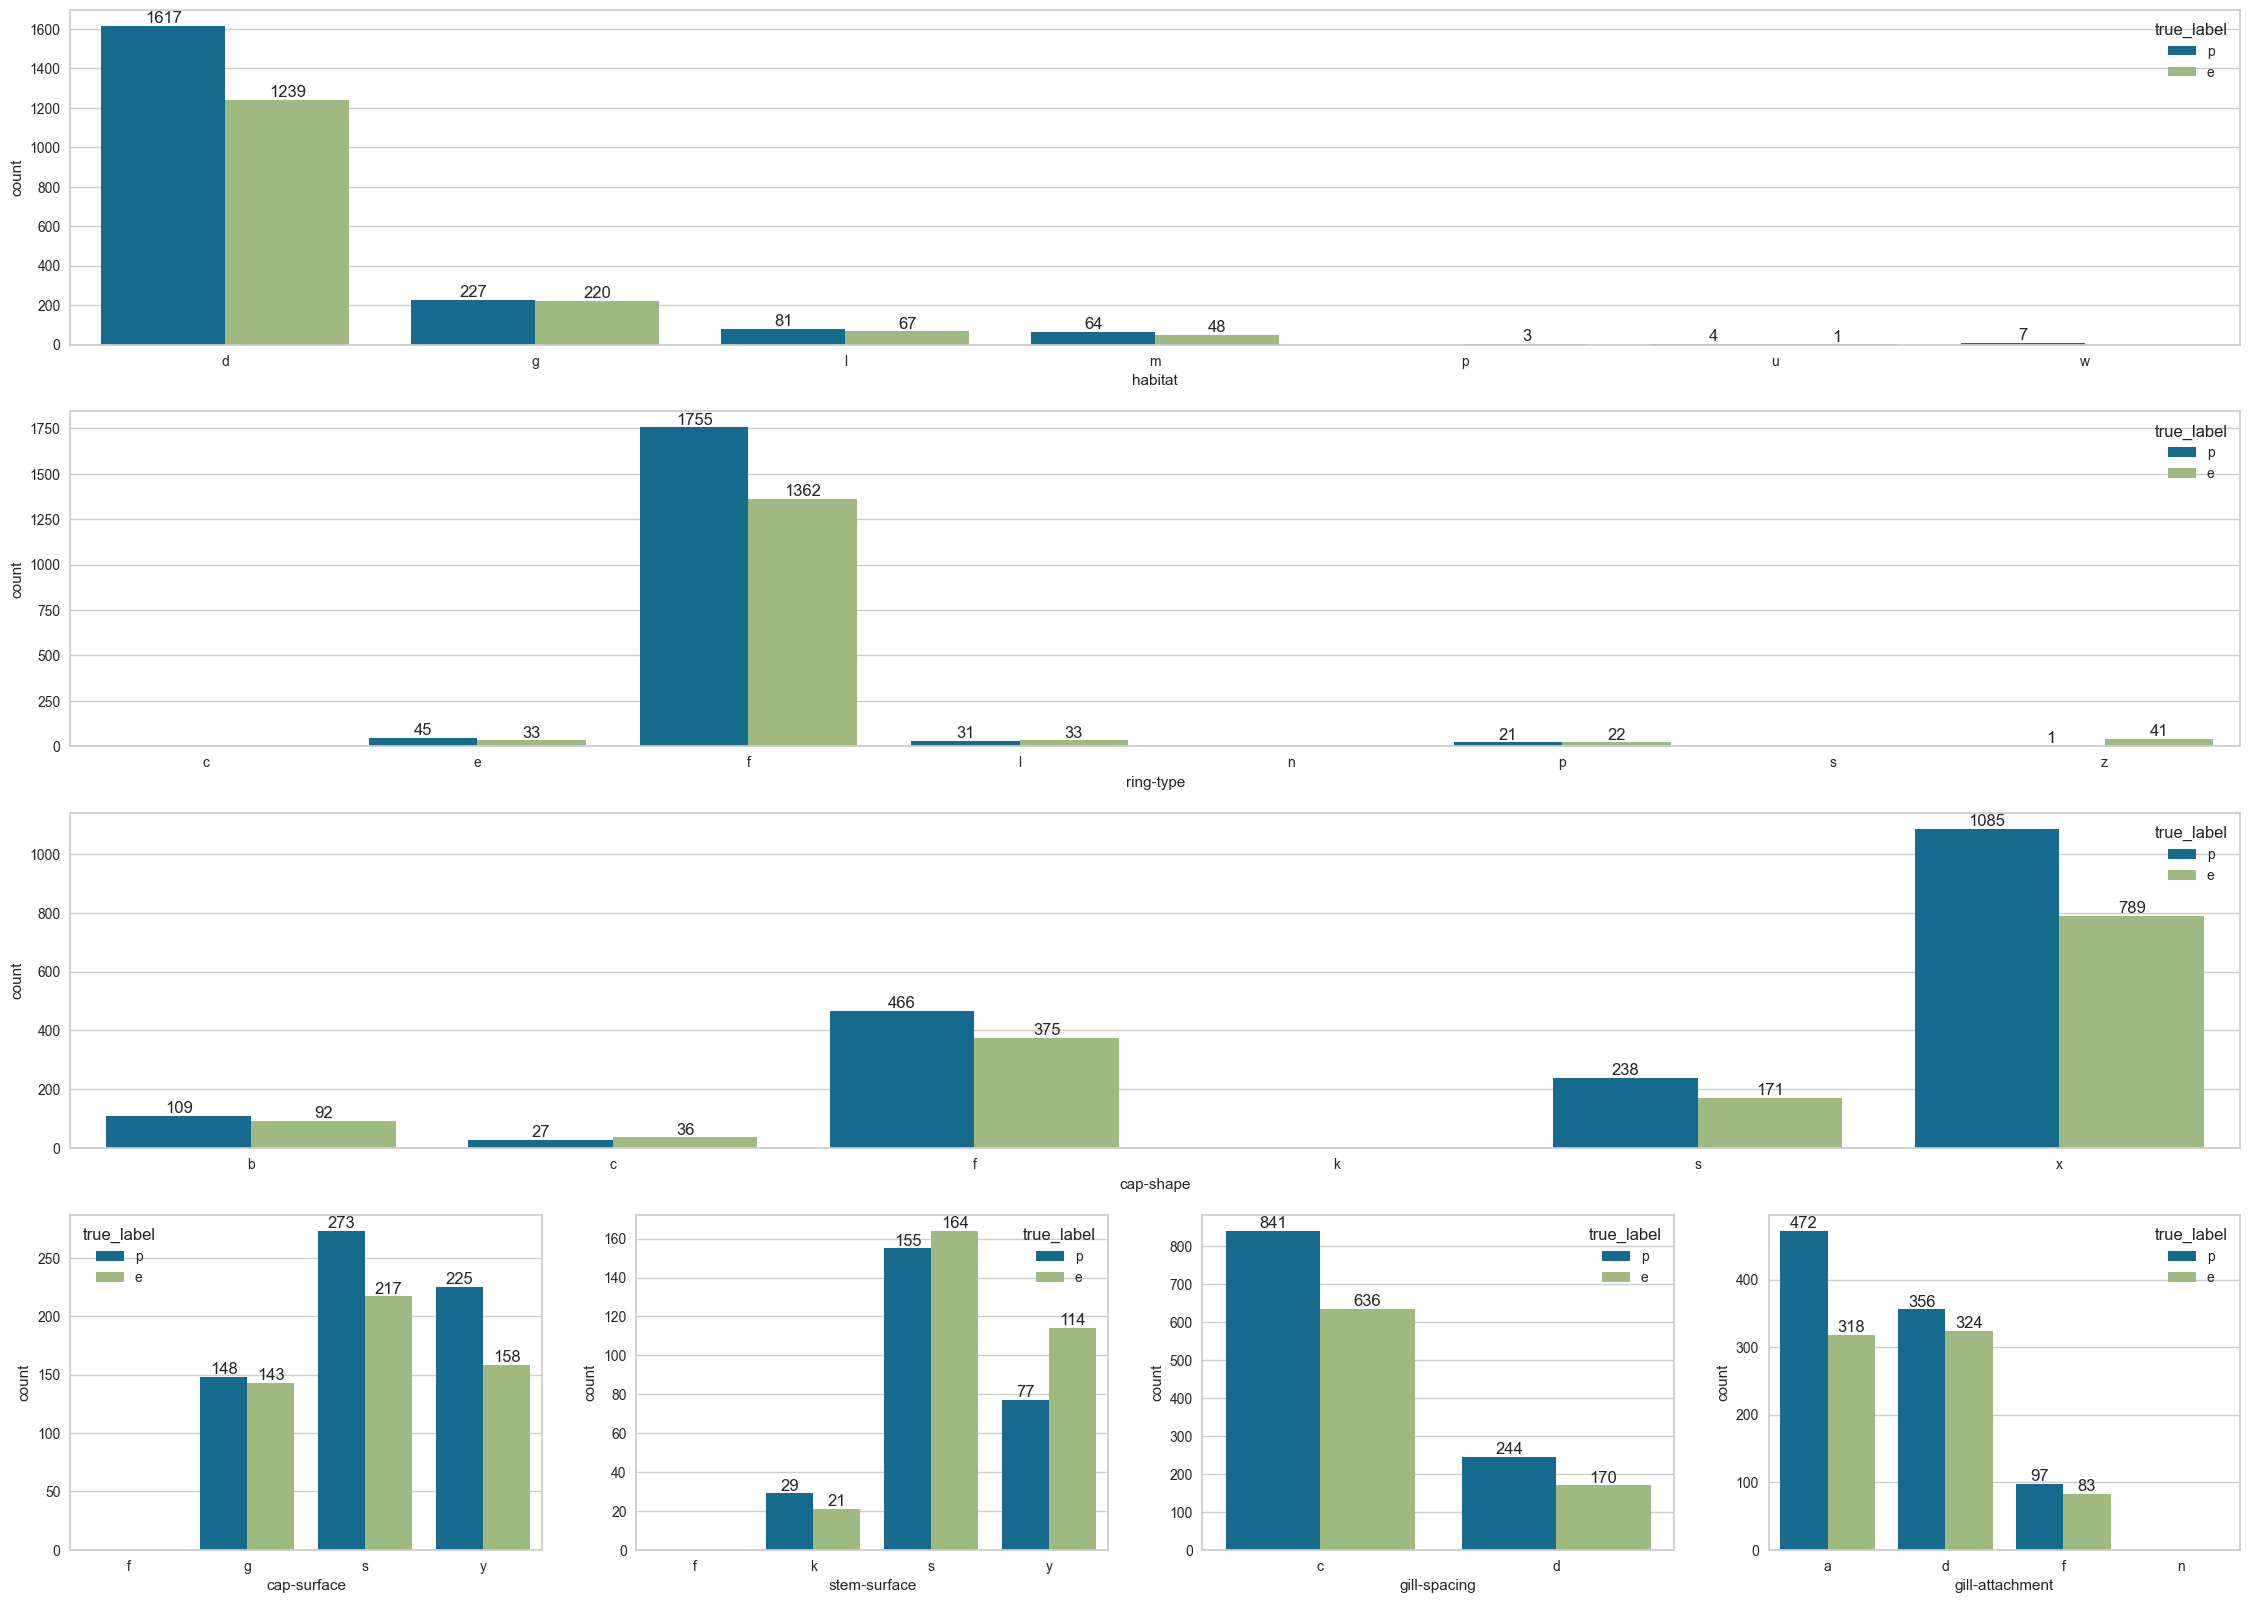

In [51]:
fig = plt.figure(figsize=(28, 20))

ax10 = plt.subplot2grid((4, 4), (0, 0), colspan=4)
sns.countplot(data=wrong, x='habitat', hue='true_label', ax=ax10)
for p in ax10.containers:
    ax10.bar_label(p, fmt="%d")

ax11 = plt.subplot2grid((4, 4), (1, 0), colspan=4)
sns.countplot(data=wrong, x='ring-type', hue='true_label', ax=ax11)
for p in ax11.containers:
    ax11.bar_label(p, fmt="%d")
    
ax12 = plt.subplot2grid((4, 4), (2, 0), colspan=4)
sns.countplot(data=wrong, x='cap-shape', hue='true_label', ax=ax12)
for p in ax12.containers:
    ax12.bar_label(p, fmt="%d")

ax13 = plt.subplot2grid((4, 4), (3, 0))
sns.countplot(data=wrong, x='cap-surface', hue='true_label', ax=ax13)
for p in ax13.containers:
    ax13.bar_label(p, fmt="%d")

ax14 = plt.subplot2grid((4, 4), (3, 1))
sns.countplot(data=wrong, x='stem-surface', hue='true_label', ax=ax14)
for p in ax14.containers:
    ax14.bar_label(p, fmt="%d")
    
ax15 = plt.subplot2grid((4, 4), (3, 2))
sns.countplot(data=wrong, x='gill-spacing', hue='true_label', ax=ax15)
for p in ax15.containers:
    ax15.bar_label(p, fmt="%d")

ax16 = plt.subplot2grid((4, 4), (3, 3))
sns.countplot(data=wrong, x='gill-attachment', hue='true_label', ax=ax16)
for p in ax16.containers:
    ax16.bar_label(p, fmt="%d")

In [52]:
feature_importance = {}
feature_importance = feature_importance.fromkeys(train_data.columns[1:])
for i, key in enumerate(feature_importance.keys()):
    feature_importance[key] = blend_model.feature_importances_[i]

In [53]:
feature_importance = sorted(feature_importance.items(), key=lambda x: -x[1])
feature_importance = dict(feature_importance)

<Axes: >

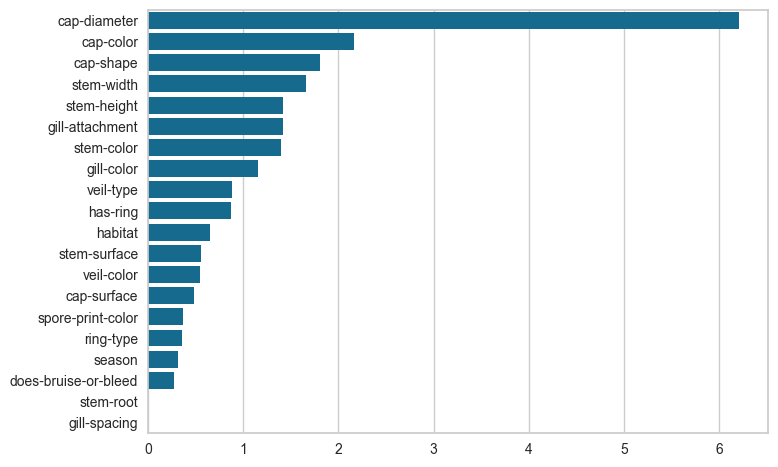

In [54]:
sns.barplot(x=feature_importance.values(), y=feature_importance.keys())

In [29]:
test_pred = predict_model(blend_model, data=test_data)

In [30]:
submission = pd.read_csv(DATA / "sample_submission.csv")

In [31]:
submission["class"] = test_pred["prediction_label"]

In [32]:
submission

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e
...,...,...
2077959,5194904,p
2077960,5194905,p
2077961,5194906,p
2077962,5194907,e


In [33]:
submission.to_csv(DATA / "exp1-blend.csv", index=False)